In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_q2 = pd.read_csv("DATA/q2_data",sep="\t", header=None) 
df_q2.columns = ["delta_t", "city", "country", "year"]

print('Percentage of missing data')
print((df_q2.isnull().sum() / len(df_q2))*100)

Percentage of missing data
delta_t    3.476569
city       0.000000
country    0.000000
year       0.486227
dtype: float64


In [11]:
key = df_q2["city"] + " " + df_q2["country"]
key

In [14]:
df_q2["key"] = key
df_q2

,delta_t,city,country,year,key
0,1.654001,Aba,Nigeria,1856.0,Aba Nigeria
1,2.278000,Aba,Nigeria,1857.0,Aba Nigeria
2,3.562000,Aba,Nigeria,1858.0,Aba Nigeria
3,3.569000,Aba,Nigeria,1859.0,Aba Nigeria
4,3.687000,Aba,Nigeria,1860.0,Aba Nigeria
...,...,...,...,...,...
717973,17.468998,San Nicolás De Los Garza,Mexico,2010.0,San Nicolás De Los Garza Mexico
717974,18.394001,San Nicolás De Los Garza,Mexico,2011.0,San Nicolás De Los Garza Mexico
717975,15.434000,San Nicolás De Los Garza,Mexico,2012.0,San Nicolás De Los Garza Mexico
717976,16.207000,San Nicolás De Los Garza,Mexico,2013.0,San Nicolás De Los Garza Mexico


In [16]:
places = np.unique(df_q2["key"])
print(places.size)
places

3491


array(['A Coruña Spain', 'Aachen Germany', 'Aalborg Denmark', ...,
       'Çorum Turkey', 'Öskemen Kazakhstan', 'Ürümqi China'], dtype=object)

In [24]:
std_q2 = pd.DataFrame(columns = ["std", "key"])
#std_q2.columns = ["std", "key"]
std_q2["key"] = places
std = []
for p in places:
    std.append(np.std(df_q2[df_q2["key"] == p]["delta_t"]))

std_q2["std"] = std

std_q2

,std,key
0,1.699842,A Coruña Spain
1,2.994094,Aachen Germany
2,2.998146,Aalborg Denmark
3,0.565940,Aba Nigeria
4,3.201737,Abadan Iran
...,...,...
3486,2.998146,Århus Denmark
3487,2.519384,Çorlu Turkey
3488,2.309756,Çorum Turkey
3489,3.767284,Öskemen Kazakhstan


In [83]:
top = std_q2.sort_values(by=['std'], ascending=False).head(30)["key"]
bot = std_q2.sort_values(by=['std'], ascending=True).head(30)["key"]
tips = list(top) + list(bot)
top

1944            Metro Indonesia
2446        Pringsewu Indonesia
1481    Karang Tengah Indonesia
2915         Sukabumi Indonesia
1712       Leuwiliang Indonesia
402             Bogor Indonesia
658            Ciomas Indonesia
2916         Sukaraja Indonesia
1516           Kemang Indonesia
662            Cisaat Indonesia
642           Ciampea Indonesia
644           Cibadak Indonesia
2412        Pontianak Indonesia
325          Bengkulu Indonesia
660           Ciputat Indonesia
1347          Jakarta Indonesia
728             Curug Indonesia
2759         Sawangan Indonesia
2771          Sepatan Indonesia
2772           Serang Indonesia
663           Cisarua Indonesia
664         Citeureup Indonesia
652            Cikupa Indonesia
653           Cilegon Indonesia
651          Cikarang Indonesia
646          Cibitung Indonesia
645          Cibinong Indonesia
2297         Pamulang Indonesia
2317           Parung Indonesia
2319       Pasarkemis Indonesia
Name: key, dtype: object

In [85]:
df_q2[df_q2["key"].isin(top)]

,delta_t,city,country,year,key
26273,39.765000,Omsk,Russia,1812.0,Omsk Russia
26274,42.938000,Omsk,Russia,1813.0,Omsk Russia
26275,37.798000,Omsk,Russia,1814.0,Omsk Russia
26276,8.598000,Omsk,Russia,1815.0,Omsk Russia
26277,33.456000,Omsk,Russia,1816.0,Omsk Russia
...,...,...,...,...,...
687388,44.065002,Nizhnevartovsk,Russia,2010.0,Nizhnevartovsk Russia
687389,40.961000,Nizhnevartovsk,Russia,2011.0,Nizhnevartovsk Russia
687390,44.801000,Nizhnevartovsk,Russia,2012.0,Nizhnevartovsk Russia
687391,43.498000,Nizhnevartovsk,Russia,2013.0,Nizhnevartovsk Russia


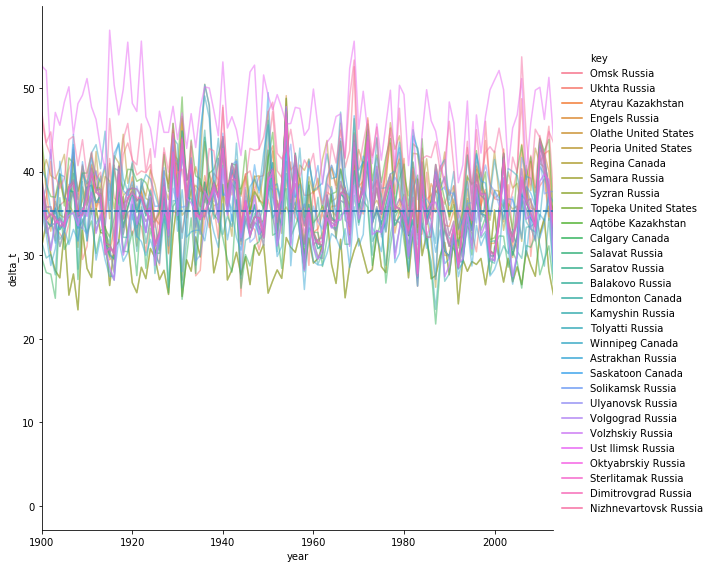

In [89]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
m = df_q2[df_q2["key"].isin(top)]["delta_t"].mean(axis=0)
g = sns.relplot(x="year", y="delta_t", hue="key", kind="line", ci=None, data=df_q2[df_q2["key"].isin(top)], height=8, alpha=0.5).set(xlim=(1900,2013))
ax0 = g.ax
ax0.axhline(m, ls='--')
plt.show()

In [90]:
g.savefig("q2.png")